<a href="https://colab.research.google.com/github/BoyinaVamsi/Credit-Card-Default-Prediction-Capstone-project-/blob/main/Credit_Card_Default_Prediction_Capstone_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Credit Card Defaulter Prediction.



##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Project Summary -**

Credit risk plays a major role in the banking industry business. Banks main sources for income are granting loans through various schemes, credit card, investment, mortgage, and others. Credit card has been one of the most booming financial services by banks over the past years. However, with the growing number of credit card users, banks have been facing an escalating credit card default rate.
As credit cards provide a least of 30 days, and some provide 45 days, to pay back the borrowed money.However, when consuming, people often lack rational thinking and overestimate their ability to repay loans to banks in time. On the one hand, it increases the loan risk of banks.With a large number of banks selling credit cards, the phenomenon of credit card default emerges one after another. It is very important for banks to effectively identify high-risk credit card default users.

# **GitHub Link -**

[link text](https://github.com/BoyinaVamsi/Credit-Card-Default-Prediction-Capstone-project-)

# **Problem Statement**


This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the K-S chart to evaluate which customers will default on their credit card payments

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import xlrd

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
dataset=pd.read_excel('/content/drive/MyDrive/ML Classification Capstone Project/default of credit card clients.xls',header=1)

### Dataset First View

In [ ]:
# Dataset First Look
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print("Shape of the datset is : ",dataset.shape)

Shape of the datset is :  (30000, 25)


### Dataset Information

In [ ]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print("The number of duplicated features present in dataset are : ",len(dataset[dataset.duplicated()]))
print("The number of unique ID's are : ",dataset.ID.nunique())

The number of duplicated features present in dataset are :  0
The number of unique ID's are :  30000


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
dataset.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

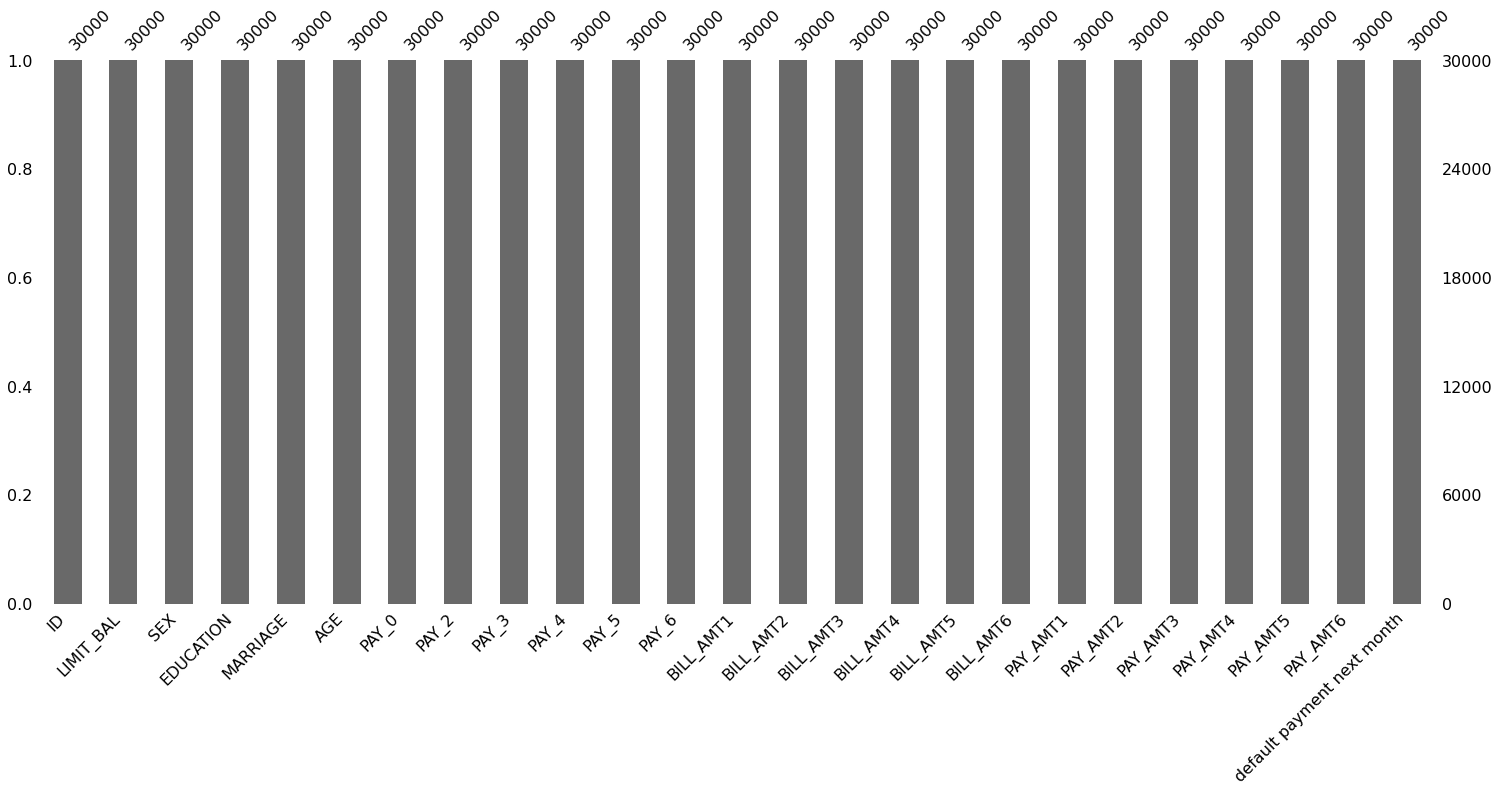

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.bar(dataset)

### What did you know about your dataset?

This dataset holds the information of customers who are using credit card services, and we have to analysis the data and find the insights about the customers who deafaults.

The above dataset has 30000 rows and 25 features. There are no mising values and duplicate features in the dataset.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(dataset.columns)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


In [ ]:
# Dataset Describe
dataset.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


### Variables Description 

#Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

ID: Customer ID

LIMIT_BAL: Amount of the given credit: it includes both the individual consumer credit and his/her family (supplementary) credit.

Gender: Type of gender Male/Female/Others. (1 = male; 2 = female).

Education: Education level (1 = graduate school; 2 = university; 3 = high school; 4 = others).

Marriage: Married/Un-married (1 = married; 2 = single; 3 = others).

Age: Age of the card holder in years.

PAY_0 to PAY_6: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: Pay_0 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;Pay_6 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

BILL_AMT1-BILL_AMT6: Amount of bill statement (NT dollar). BILL_AMT1 = amount of bill statement in September, 2005; BILL_AMT2 = amount of bill statement in August, 2005; . . .; BILL_AMT6 = amount of bill statement in April, 2005.

PAY_AMT1-PAY_AMT6: Amount of previous payment (NT dollar). PAY_AMT1 = amount paid in September, 2005; PAY_AMT2 = amount paid in August, 2005; . . .;PAY_AMT6 = amount paid in April, 2005.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for col in dataset.columns:
  print("The number of unique values in ", col, " are: ", dataset[col].nunique())

The number of unique values in  ID  are:  30000
The number of unique values in  LIMIT_BAL  are:  81
The number of unique values in  SEX  are:  2
The number of unique values in  EDUCATION  are:  7
The number of unique values in  MARRIAGE  are:  4
The number of unique values in  AGE  are:  56
The number of unique values in  PAY_0  are:  11
The number of unique values in  PAY_2  are:  11
The number of unique values in  PAY_3  are:  11
The number of unique values in  PAY_4  are:  11
The number of unique values in  PAY_5  are:  10
The number of unique values in  PAY_6  are:  10
The number of unique values in  BILL_AMT1  are:  22723
The number of unique values in  BILL_AMT2  are:  22346
The number of unique values in  BILL_AMT3  are:  22026
The number of unique values in  BILL_AMT4  are:  21548
The number of unique values in  BILL_AMT5  are:  21010
The number of unique values in  BILL_AMT6  are:  20604
The number of unique values in  PAY_AMT1  are:  7943
The number of unique values in  PAY_A

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
#creating a dataset copy
df=dataset.copy()


In [ ]:
#Dropping the ID column.
df.drop(['ID'],axis=1,inplace=True)

In [ ]:
#Renaming the dataset columns for better usability
df.rename(columns={"PAY_0": "PAY_1", "default payment next month": "DEFAULT"}, inplace=True)

In [ ]:
df.columns = [col.capitalize() for col in df.columns.tolist()]
df

,Limit_bal,Sex,Education,Marriage,Age,Pay_1,Pay_2,Pay_3,Pay_4,Pay_5,...,Bill_amt4,Bill_amt5,Bill_amt6,Pay_amt1,Pay_amt2,Pay_amt3,Pay_amt4,Pay_amt5,Pay_amt6,Default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [ ]:
#Unique values in Sex are:
df.Sex.value_counts()

2    18112
1    11888
Name: Sex, dtype: int64

The number of Female are 11888 and Male are 18112.
1 = Male; 2 = Female.


In [ ]:
#Unique values in Education are:
df.Education.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: Education, dtype: int64


Education level: 1 = graduate school; 2 = university; 3 = high school; 4 = others, As no data was provided for level 5, 6 and 0 are treated as others.


In [ ]:
#Replacing not defined data values in Education Column.
df.Education.replace(to_replace=[0,5,6],value=4,inplace=True )
df.Education.value_counts()

2    14030
1    10585
3     4917
4      468
Name: Education, dtype: int64

In [ ]:
#Unique values in Marriage are:
df.Marriage.value_counts()

2    15964
1    13659
3      323
0       54
Name: Marriage, dtype: int64

1 = Married; 2 = Single; 3 = Others, so the values not defined in data are treated as Others.

In [ ]:
#Replacing not defined data values in Marriage Column.
df.Marriage.replace(to_replace=0,value=3,inplace=True )
df.Marriage.value_counts()

2    15964
1    13659
3      377
Name: Marriage, dtype: int64

In [ ]:
#Unique values in Pay_0 are:
df.Pay_1.value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: Pay_1, dtype: int64

### What all manipulations have you done and insights you found?



1. Deleted ID column as it represents the customer Identification only.

2. Modified the Column names for better usage.

3. Created Age group column for better data understanding. 



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Default Variable (Univariate)

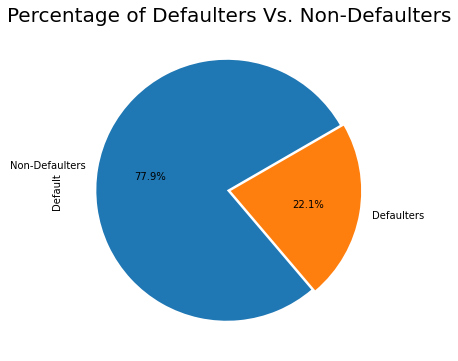

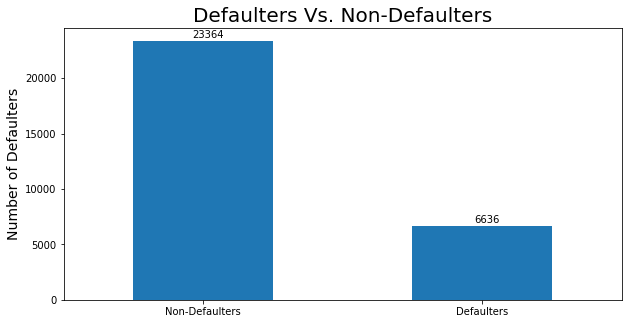

In [ ]:
# Visualizing the percentage of defaulters and non- defaulters.
ax=df.groupby(['Default'])['Default'].value_counts().plot.pie(labels=['Non-Defaulters','Defaulters'],figsize=(10,6),explode=[0.02,0.01],autopct='%1.1f%%',startangle=30)
plt.title("Percentage of Defaulters Vs. Non-Defaulters", fontsize= 20)
plt.show()
#prinitng the number of defaults using bar plot
ax=df['Default'].value_counts().plot.bar(figsize=(10,5), rot=0)
plt.title("Defaulters Vs. Non-Defaulters", fontsize= 20)
plt.ylabel("Number of Defaulters", fontsize= 14)
ax.set_xticklabels(('Non-Defaulters', 'Defaulters'))
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(5, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

##### 1. Why did you pick the specific chart?

Pie Chart is used represnt Categorical data in a more efficient way. Each category can be represented as the relative percent of each category to the whole data. 

Bar Chart represents the frequecy or values count of a categorical variable. Bar charts also shows the percentages of the variables.

So, I have used Pie and Bar chart to represnt the Target data in percentages and count numbers respectively.


##### 2. What is/are the insight(s) found from the chart?

From the above visualizations, the total number of defaulters are 6636 which is 22.1%. The number of Non-defaulters are 23364 which is 77.9%.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Default credit cards are an important issue that brings negative consequences to banks. If a customer does not pay his obligations, banks loose money. In order to avoid all of that trouble, effective methods that are able to predict the default of credit cards are needed. Therefore, default credit card prediction is an important, challenging and useful task that should be addressed.

#### Chart - 2: Sex variable(Univariate & Bivariate)

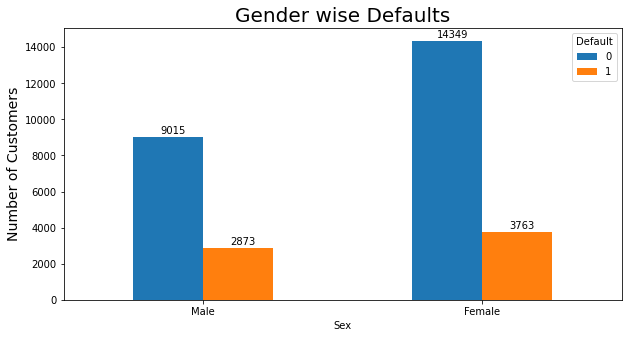

In [ ]:
# Visuailizing Gender wise Defaults
ax=df.groupby('Sex').Default.value_counts().unstack().plot.bar(figsize=(10,5), rot=0)
plt.title("Gender wise Defaults", fontsize= 20)
plt.ylabel("Number of Customers", fontsize= 14)
ax.set_xticklabels(('Male', 'Female'))
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(5, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

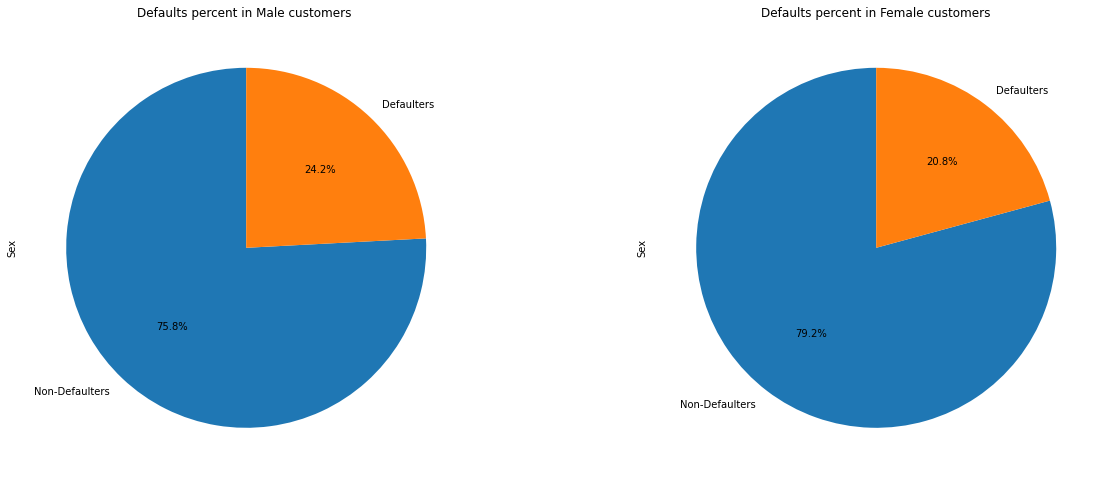

In [ ]:
# Plotting a Pie chart for percentage defaults individually based on type of gender.

#Subplot-1 for finding the defaulters percentages in Male .
male_data=df[["Sex","Default"]]
male_data=male_data[male_data['Sex']==1]
fig1=male_data.groupby(["Default"])["Sex"].value_counts()
plt.subplot(1, 2, 1)
fig1.plot.pie(labels=['Non-Defaulters','Defaulters'],figsize=(15,10),autopct="%1.1f%%",title="Defaults percent in Male customers ",startangle=90)

#Subplot-2 for finding the defaulters percentages in Female .
female_data=df[["Sex","Default"]]
female_data=female_data[female_data['Sex']==2]
fig2=female_data.groupby("Default")["Sex"].value_counts()
plt.subplot(1, 2, 2)
fig2.plot.pie(labels=['Non-Defaulters','Defaulters'],figsize=(15,10),autopct="%1.1f%%",title="Defaults percent in Female customers",startangle=90)

plt.subplots_adjust(left=0.1,bottom=0.1,right=1.1,top=0.9, wspace=0.4,hspace=1) 
plt.show()
           

##### 1. Why did you pick the specific chart?

Bar Chart represents the frequecy or values count of a categorical variable. Bar charts also shows the percentages of the variables.

So, I have used Bar chart to represnt the Gender data and Gender wise default numbers.

##### 2. What is/are the insight(s) found from the chart?

The Given data has Male and Female customers.
The Female customers are 18112, in which the defaulting number is 3763.
The Male customers are 11888, the number of defaults are 2873

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Even though the number of male customers are less compared to the female, the percentage of defaulters is high in Male customers.

#### Chart - 3: Education Variable (Univariate & Bivariate)

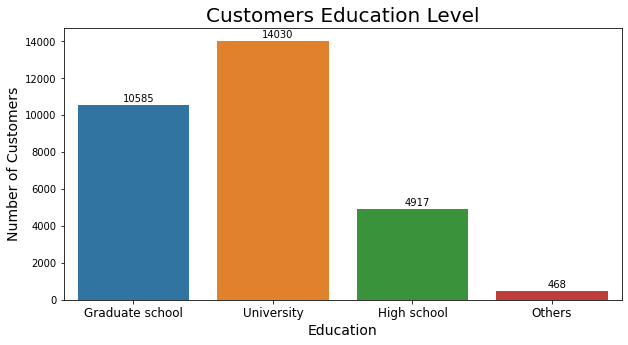

In [ ]:
# Customers Education levels visualization.
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df,x='Education')
plt.title("Customers Education Level", fontsize= 20)
plt.xlabel("Education", fontsize= 14)
plt.ylabel("Number of Customers", fontsize= 14)
ax.set_xticklabels(('Graduate school','University','High school','Others'),size=12)
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(5, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

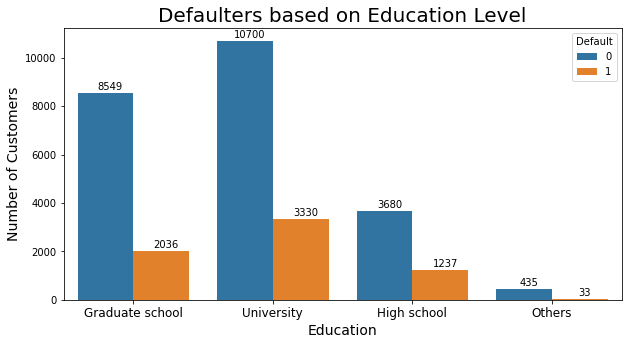

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df,x='Education',hue='Default')
plt.title("Defaulters based on Education Level", fontsize= 20)
plt.xlabel("Education", fontsize= 14)
plt.ylabel("Number of Customers", fontsize= 14)
ax.set_xticklabels(('Graduate school','University','High school','Others'),size=12)
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(5, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

##### 1. Why did you pick the specific chart?

Pie Chart is used represnt Categorical data in a more efficient way. Each category can be represented as the relative percent of each category to the whole data.

Bar Chart represents the frequecy or values count of a categorical variable. Bar charts also shows the percentages of the variables.

Countplot is usefull to plot the data of two catagoprical variables.count plot is used to represnt frequency/count of values of one categorical variable against another categorical variables. 

So, I have used Pie chart and Bar chart and count plot to represnt the Target data in percentages and count numbers respectively.

##### 2. What is/are the insight(s) found from the chart?

Defaulters in Graduate school, University, High school and others are 2036, 3330,1237 and 33 respectively and non defaulters are 8549,10700,3680 and 435 respectively.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Even the number of customers whose education level is High School is very less compared to Graduate school and University, the default number is very high.

In [ ]:
df.columns

Index(['Limit_bal', 'Sex', 'Education', 'Marriage', 'Age', 'Pay_1', 'Pay_2',
       'Pay_3', 'Pay_4', 'Pay_5', 'Pay_6', 'Bill_amt1', 'Bill_amt2',
       'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'Pay_amt1',
       'Pay_amt2', 'Pay_amt3', 'Pay_amt4', 'Pay_amt5', 'Pay_amt6', 'Default'],
      dtype='object')

#### Chart - 4: Marriage (Univariate & Bivariate):

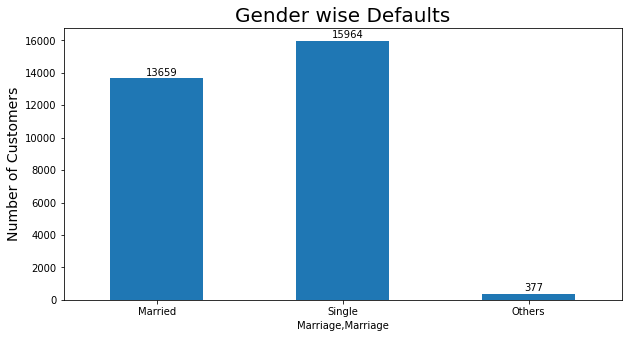

In [ ]:
# Marraige Variable visualization
ax=df.groupby('Marriage').Marriage.value_counts().plot.bar(figsize=(10,5), rot=0)
plt.title("Gender wise Defaults", fontsize= 20)
plt.ylabel("Number of Customers", fontsize= 14)
ax.set_xticklabels(('Married', 'Single','Others'))
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(5, space), textcoords="offset points", ha='center', va='bottom')
plt.show()


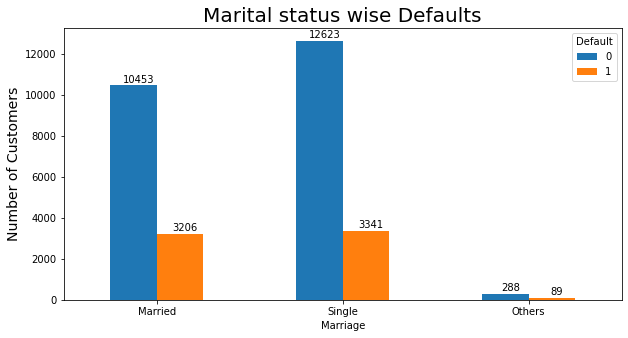

In [ ]:
# Marraige Variable visualization
ax=df.groupby('Marriage').Default.value_counts().unstack().plot.bar(figsize=(10,5), rot=0)
plt.title("Marital status wise Defaults", fontsize= 20)
plt.ylabel("Number of Customers", fontsize= 14)
ax.set_xticklabels(('Married', 'Single','Others'))
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(5, space), textcoords="offset points", ha='center', va='bottom')
plt.show()


##### 1. Why did you pick the specific chart?

Bar Chart represents the frequecy or values count of a categorical variable. Bar charts also shows the percentages of the variables.

So, I have used Bar chart to represent the Defaulter data as per the marital status.

##### 2. What is/are the insight(s) found from the chart?

The number of defaulters in Married and Unmarried are 3206 and 3341 respectively. Even the married customers are less than unmarried, their default percentage is high than the unmarried. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No, let alone based on the Marital status can't help to decide whether an individual will pay the credit amount used duly or will default.

#### Chart - 5: Age(Univariate & Bivariate)

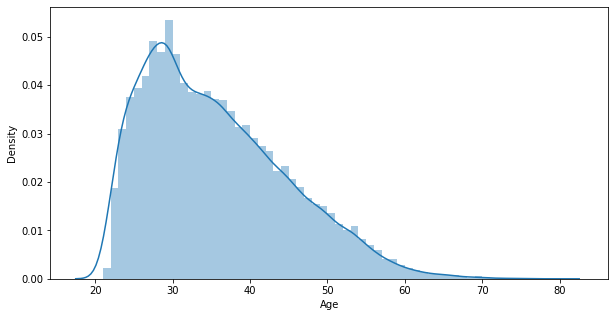

In [ ]:
#Knowing the distribution of Age variable
data = df['Age']
bins = np.arange(min(data), max(data) + 5, 1)
plt.figure(figsize=(10,5))
sns.distplot(data, bins = bins)
plt.ylabel('Density')
plt.xlabel('Age')

plt.show()

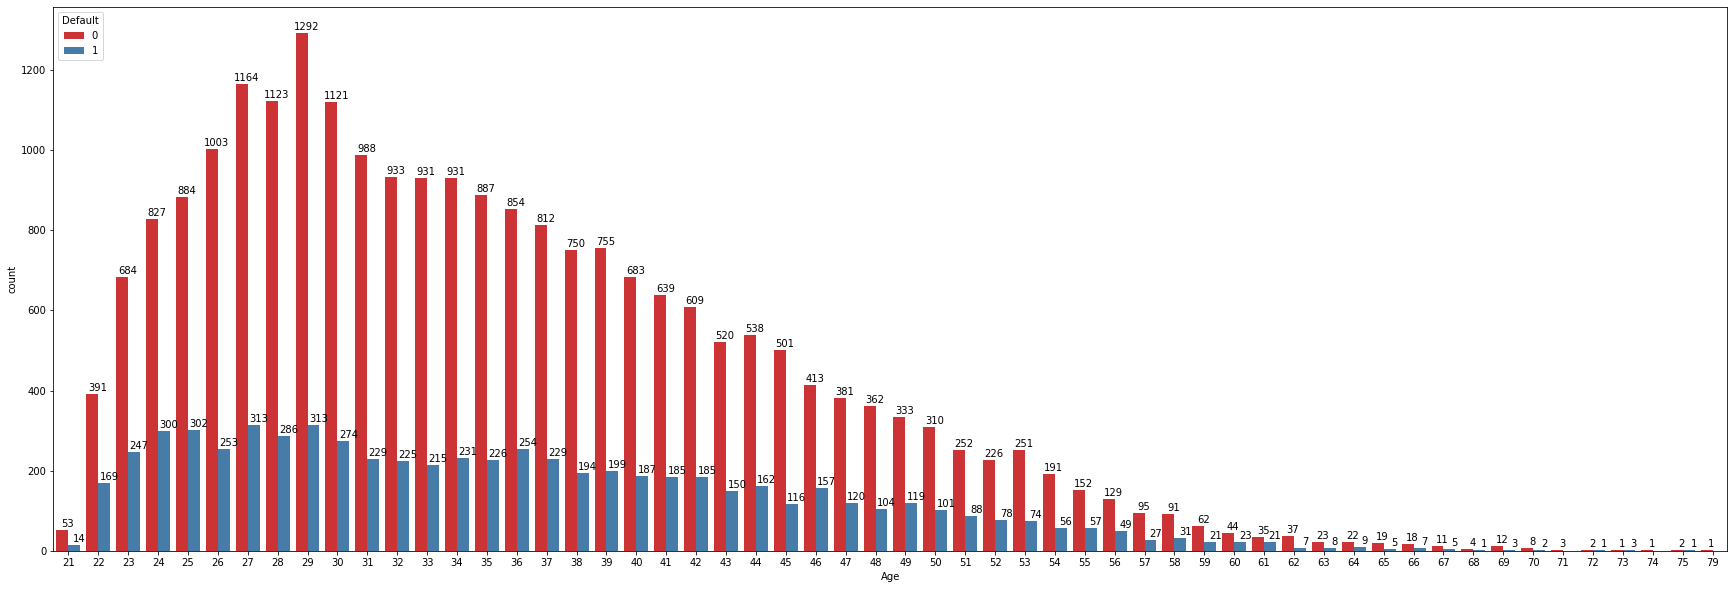

In [ ]:
#plotting values count for Age with respect to IsDefaulter
plt.figure(figsize=(30,10))
ax=sns.countplot(x = 'Age', hue = 'Default', data = df,palette= "Set1" )
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(5, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

##### 1. Why did you pick the specific chart?

A Density Plot visualises the distribution of data over a continuous interval or time period. This chart is a variation of a Histogram that uses kernel smoothing to plot values, allowing for smoother distributions by smoothing out the noise.

A histogram is basically used to represent data provided in a form of some groups.It is accurate method for the graphical representation of numerical data distribution.It is a type of bar plot where one axis represents the bin ranges while the other axis gives information about frequency.

So, I have used these plots to know the density of different values and the defaulted customers.

##### 2. What is/are the insight(s) found from the chart?

Most people in our dataset ranges in between 25 and 40 years old.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As the more number of defaulters are between the Age of 20 to 25, and greater than 60 years even the customers are less. Proper review has to be done before issueing the credit card. Else it may impact the business growth negatively.

#### Chart - 6: Limit Balance(Univariate & Bivariate)

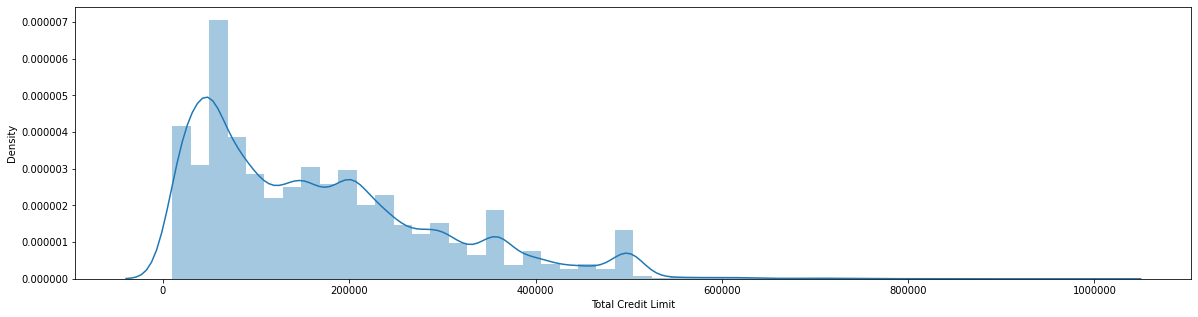

In [ ]:
# Visualizing the Total Credit Limit using Density plot
data = df['Limit_bal']
#bins = np.arange(min(data), max(data) + 2, 1)
plt.figure(figsize=(20,5))
sns.distplot(data)
plt.ticklabel_format(style='plain', axis='x') 
plt.ticklabel_format(style='plain', axis='y') 
plt.ylabel('Density')
plt.xlabel('Total Credit Limit')
plt.show()

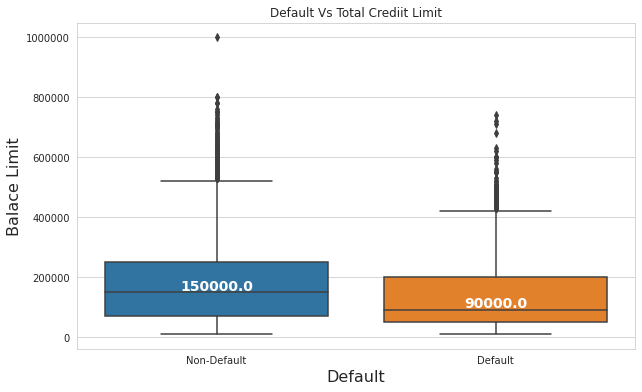

In [ ]:
# Marraige Variable visualization
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
ax=sns.boxplot(x='Default',y='Limit_bal', data=df)
medians = df.groupby(['Default'])['Limit_bal'].median()
vertical_offset = df['Limit_bal'].median() * 0.05 # offset from median for display
plt.ticklabel_format(style='plain', axis='y') 
plt.title("Default Vs Total Crediit Limit")
plt.xlabel("Default",fontsize=16)
plt.ylabel("Balace Limit",fontsize=16)
ax.set_xticklabels(('Non-Default','Default'))
for xtick in ax.get_xticks():
    ax.text(xtick,medians[xtick] + vertical_offset,medians[xtick],horizontalalignment='center',size=14,color='w',weight='semibold')
plt.show()

##### 1. Why did you pick the specific chart?

A Density Plot visualises the distribution of data over a continuous interval or time period. This chart is a variation of a Histogram that uses kernel smoothing to plot values, allowing for smoother distributions by smoothing out the noise.

Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data’s symmetry, skew, variance, and outliers.

So, I have used Density to show the distribution of credit limit and Box plot for represnting the m

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code
past_pay_status=df[['Pay_1','Pay_2','Pay_3','Pay_4','Pay_5','Pay_6']]
for col in past_pay_status.columns:

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here